# Photo Compression System With K-Means 🖼️
##### My Github:ARSALANnam(Echolyno)
##### My Email: arsalannam9710@gmail.com
##### My Linkedin:www.linkedin.com/in/arsalannam


## This Python code demonstrates how to compress an image by reducing the number of unique colors using the K-Means clustering algorithm. This method is particularly useful for decreasing image file size while retaining reasonable visual quality.

# Import Packages

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import cv2 : Imports the OpenCV library, which is used for image processing operations such as reading, writing, and converting images.  

from sklearn.cluster import KMeans : Imports the KMeans class from the cluster module of the scikit-learn library. This class provides the implementation of the K-Means clustering algorithm.

# Read Photo

In [7]:
img = cv2.imread("test.jpeg") 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB): Converts the loaded image from BGR format (which OpenCV uses by default) to RGB (Red, Green, Blue) format. Matplotlib expects images in RGB format for correct display.

# Prepare Pixels for K-Means

In [8]:
pixels = img.reshape(-1,3) #This line reshapes the img array into a 2D array.

-1 tells NumPy to automatically calculate the number of rows (which will be the total number of pixels in this case).

3 indicates the number of columns, corresponding to the three color channels (R, G, B) for each pixel.

In [9]:
print(pixels.ndim)
print(pixels.size)
print(pixels.shape)
pixels

2
2304192
(768064, 3)


array([[ 30,  73,  80],
       [ 35,  78,  85],
       [ 34,  77,  84],
       ...,
       [198, 121,  93],
       [197, 136, 108],
       [236, 185, 158]], shape=(768064, 3), dtype=uint8)

#  K-Means Clustering

In [10]:
k = 16
kmeans = KMeans(n_clusters=k,random_state=42, n_init=10)
kmeans.fit(pixels) 

KMeans(n_clusters=16, n_init=10, random_state=42)

k = 16 : Sets the number of clusters (and consequently, the final number of dominant colors) to 20. You can change this value to observe its effect on compression and image quality.  

n_clusters=k: Specifies the desired number of clusters.  

random_state=42: Sets a seed for the random number generator to ensure reproducible clustering results across different runs.  

n_init=10: The number of times the K-Means algorithm will be run with different centroid seeds. The best result (in terms of inertia) will be chosen.

# Reconstruct Compressed Image

### This line retrieves the color of the cluster center to which each original pixel belongs. This is effectively the compressed color for each pixel.

In [11]:
new_colors = kmeans.cluster_centers_[kmeans.labels_]
# kmeans.labels_: An array containing the cluster label for each original pixel (e.g., 0 to k-1).
# kmeans.cluster_centers_: An array containing the RGB values of the centroids of each cluster (the dominant colors).

In [12]:
compressed_img = new_colors.reshape(img.shape).astype(np.uint8)
# new_colors.reshape(img.shape): Reshapes the new_colors array back into the original image shape (height, width, 3).
# .astype(np.uint8): Converts the color values to the uint8 data type. 
# This is necessary for proper image display and saving in standard image formats, as pixel values typically range from 0 to 255.

# Display Images

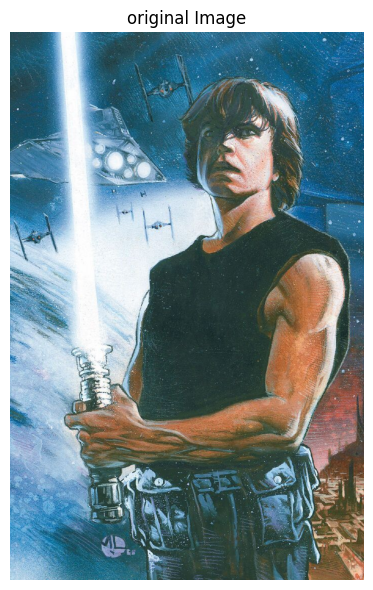

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("original Image")
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
# Automatically adjusts subplot parameters for a tight layout, preventing labels and titles from overlapping.

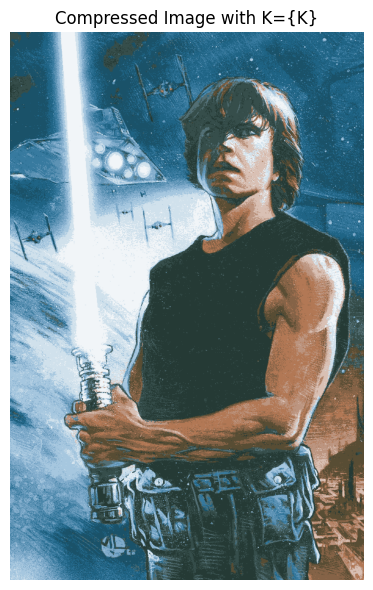

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.title("Compressed Image with K={K}")
plt.imshow(compressed_img)
plt.axis('off')
plt.tight_layout()
# Automatically adjusts subplot parameters for a tight layout, preventing labels and titles from overlapping.

# Save Compressed Image 📥

In [16]:
cv2.imwrite("compressed.jpg",cv2.cvtColor(compressed_img,cv2.COLOR_RGB2BGR),[int(cv2.IMWRITE_JPEG_QUALITY), 50])

True

# Model Evaluation

## Compression Ratio ✅

In [17]:
import os

original_file_size = os.path.getsize("test.jpeg")
compressed_file_size = os.path.getsize("compressed.jpg")

compression_ratio = original_file_size / compressed_file_size
reduction_percentage = ((original_file_size - compressed_file_size) / original_file_size) * 100

print(f"Original file size: {original_file_size / 1024:.2f} KB")
print(f"Compressed file size: {compressed_file_size / 1024:.2f} KB")
print(f"Compression Ratio: {compression_ratio:.2f}x")
print(f"Size Reduction: {reduction_percentage:.2f}%")

Original file size: 189.12 KB
Compressed file size: 108.62 KB
Compression Ratio: 1.74x
Size Reduction: 42.56%


## Computational Time ✅

In [18]:
import time

start_time = time.time()
for i in range(1000000):
    pass

end_time = time.time()

processing_time = end_time - start_time
print(f"Processing time: {processing_time:.4f} seconds")

Processing time: 0.0233 seconds


## SSIM ✅

In [19]:
from skimage.metrics import structural_similarity

ssim_value = structural_similarity(img, compressed_img, data_range=255, multichannel=True, win_size=3)
print(f"SSIM: {ssim_value:.4f}")

SSIM: 0.9040




  
# Thank you for your Support 🤗